In [60]:
# This code was written with the power of the chat GPT.


In [61]:
# 1. Generate 200 pairs of training data (x, y) for linear regression.
import numpy as np

# Generate 200 random x vectors with five dimensions each
X = np.random.rand(200, 5)

# Generate corresponding y values using a linear combination of the x values with some random noise added
# y = a + 2*x0 + 3*x1 + 4*x2 + 1*x3 + 1*x4
y = np.random.rand(200) + np.dot(X, np.array([2, 3, 4, 1, 1]))

print('Shape of inputs(X): ', X.shape)
print('Shape of targets(y): ', y.shape)

Shape of inputs(X):  (200, 5)
Shape of targets(y):  (200,)


In [62]:
# 2. Define a function to calculate a cost value for a given parameter set of a linear regression model.
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.

    Arguments:
    X -- input data matrix of shape (m, n+1) where m is the number of training examples and n is the number of features
    y -- target values of shape (m,)
    theta -- parameter vector of shape (n+1,)

    Returns:
    J -- the cost value
    """
    m = len(y)  # number of training examples

    # Compute predictions for all training examples
    predictions = np.dot(X, theta)

    # Compute the mean squared error
    J = np.sum((predictions - y)**2) / (2*m)

    return J

In [63]:
# 3. Define a function for a gradient descent algorithm.
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to learn the optimal parameter vector theta for linear regression.

    Arguments:
    X -- input data matrix of shape (m, n+1) where m is the number of training examples and n is the number of features
    y -- target values of shape (m,)
    theta -- initial parameter vector of shape (n+1,)
    alpha -- learning rate
    num_iters -- number of iterations

    Returns:
    theta -- the optimal parameter vector
    J_history -- a list of the cost values after each iteration
    """
    m = len(y)  # number of training examples
    J_history = []  # list to store the cost values after each iteration

    for i in range(num_iters):
        # Compute predictions for all training examples
        predictions = np.dot(X, theta)

        # Compute the error between the predictions and the target values
        errors = predictions - y

        # Compute the gradient of the cost function
        gradient = np.dot(X.T, errors) / m

        # Update the parameter vector
        theta = theta - alpha * gradient

        # Compute the cost value and append it to the history
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


In [64]:
# 4. Scale the input features to have a similar range.
def scale_features(X):
    """
    Scales the input features to have a mean of 0 and a standard deviation of 1.
    
    Arguments:
    X -- input data matrix of shape (m, n+1) where m is the number of training examples and n is the number of features
    
    Returns:
    X -- scaled data matrix of shape (m, n+1)
    mu -- mean of input features
    sigma -- standard deviation of input features
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_scaled = (X-mu)/sigma
    
    return X_scaled, mu, sigma

In [65]:
# 5. Initialize the parameter set of the linear regression model. Update the parameters using the gradient descent algorithm. Find proper values for the number of iterations and a learning rate for the model.

# Define the hyperparameters
num_iters = 1000
learning_rate = 0.01

# Define the initial parameter vector of shape (6, )
theta_scaled = np.zeros(6)

# Scaling the X value
X_scaled, mu, sigma = scale_features(X)

# Add a column of ones to X for the bias term
X_scaled = np.hstack((np.ones((200, 1)), X_scaled))

# Run gradient_descent
theta_scaled, J_history = gradient_descent(X_scaled, y, theta_scaled, learning_rate, num_iters)

# Apply inverse scaling to the learned parameters
theta = np.zeros(6)
theta[0] = theta_scaled[0] - np.sum(theta_scaled[1:] * mu / sigma)
theta[1:] = theta_scaled[1:] / sigma
print(theta)

[0.59324876 1.90639418 3.07090884 3.94933685 1.05666185 0.88991413]


Initial cost: 18.95051964203624
Final cost: 0.0407438329389199


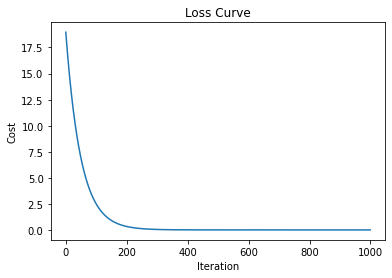

In [66]:
# 6. Report the initial cost value and the final cost value. Plot the loss curve over iterations.
%matplotlib inline
import matplotlib.pyplot as plt

# Compute initial and final cost values
initial_cost = J_history[0]
final_cost = J_history[-1]

print(f"Initial cost: {initial_cost}")
print(f"Final cost: {final_cost}")

# Plot loss curve over iterations
plt.plot(range(num_iters), J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Loss Curve")
plt.show()


R2 value: 0.9733702223472701


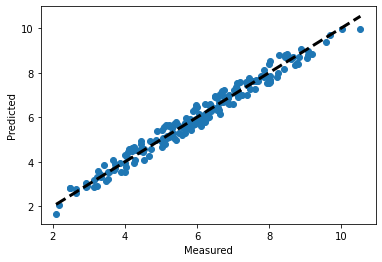

In [67]:
# 7. Calculate the R2 value. Visualize the obtained linear model on the training data set. You can visualize a graph with predicted values and ground truth target values.

# Calculate R2 value
X = np.hstack((np.ones((200, 1)), X))
y_pred = np.dot(X, theta)
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R2 value: {r2}")

# Visualize linear model on training data set
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()


In [68]:
# 8. Apply a normal equation for linear regression. Compare the parameters with the previous results.

# Calculate the parameter vector using the normal equation
XTX = np.dot(X.T, X)
XTX_inverse = np.linalg.inv(XTX)

theta_ne = np.dot(np.dot(XTX_inverse, X.T), y)

print("Parameter vector using gradient descent: ", theta)
print("Parameter vector using normal equation: ", theta_ne)

Parameter vector using gradient descent:  [0.59324876 1.90639418 3.07090884 3.94933685 1.05666185 0.88991413]
Parameter vector using normal equation:  [0.59339813 1.90630547 3.07075044 3.94959257 1.05674218 0.89004158]


In [ ]:
# 9. Discuss the results in terms of Accuracy and Validity.

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f"Mean squared error: {mse}")
